In [240]:
from math import log
import operator

 $l(x_{i}):信息的期望值$ 
$$l\left(x_{i}\right)=-\log _{2} p\left(x_{i}\right)$$
$p(x_{i})$:选择该分类的概率 
$$H=-\sum_{i=1}^{n} p\left(x_{i}\right) \log _{2} p\left(x_{i}\right) $$
$H$：香农信息熵：所有可能值包含的信息期望值

In [241]:
def calcShanonEnt(dataSet):
    numEntires = len(dataSet)  # 计算数据集实例总数
    labelCounts = {} # 创建字典，
    for featVec in dataSet:
        currentLabel = featVec[-1] # 当前标签=倒数第一个向量
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0 
        labelCounts[currentLabel] += 1 #属于该标签的样本统计数量++
        shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntires #计算概率
        shannonEnt -= prob*log(prob,2) #求对数，概率*信息期望值（熵） 累加 得到信息期望值H
    return shannonEnt

创建数据集

In [242]:
def createDataSet():
    dataSet =[ [1,1, 'yes'],
               [1,1,'yes'],
               [1,0,'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [243]:
myDat, labels = createDataSet()
myDat
# calcShanonEnt(myDat)
# myDat[0][-1]='maybe'   # 测试添加一个类，熵越高，则混合的数据也越多
# calcShanonEnt(myDat)  

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

按照给定特征划分数据集

In [244]:
"""
dataSet:待划分数据集 
axias:特征维数
value：需要返回的特征的值 
"""
def splitDataSet(dataSet, axis, value):
    retDataSet = [] # 创建List,遍历发现符合要求就加进去
    for featVec in dataSet: # 抽取符合特征的数据
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:]) # appendlist，把list当作一整个元素
            retDataSet.append(reducedFeatVec) # extend 拆分list为许多单个元素
    return retDataSet

In [245]:
myDat, labels = createDataSet()
# splitDataSet(myDat,1,1)

通过计算信息增益，选择最好划分数据集方式

信息增益：熵的减少/无序度的减少

In [246]:
def chooseBesetFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) -1
    baseEntropy = calcShanonEnt(dataSet) # 原始香农熵
    bestInfoGain = 0.0 # 信息增益
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]  # 列表推导创建列表，将数据中第i个特征值写入list
        uniqueVals = set(featList) # 从列表中创建集合是python语言得到列表中唯一元素值的最快方法
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShanonEnt(subDataSet) #切割数据集后的香农熵
        infoGain = baseEntropy - newEntropy
        print("第%d个特征的增益为%.3f" % (i,infoGain))
        if(infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature


In [247]:
chooseBesetFeatureToSplit(myDat)

第0个特征的增益为0.420
第1个特征的增益为0.171


0

返回出现次数最多的类别名称

In [248]:
def majorityCnt(classList):
    classCount ={}
    for vote in classList:
        if vote not in classCount.keys(): 
            classCount[vote] = 0
        classCount[vote]+=1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

递归创建树（ID3算法）

In [249]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList): # 类别相同则停止继续划分
        return classList[0]
    if len(dataSet[0]) == 1: 
        return majorityCnt(classList)
    bestFeat = chooseBesetFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:] # 复制类标签存储到新列表变量中，防止改变原列表
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,bestFeat,value), subLabels)
    return myTree

In [250]:
myTree = createTree(myDat, labels)
myTree

第0个特征的增益为0.420
第1个特征的增益为0.171
第0个特征的增益为0.918


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

绘图

In [251]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

decisionNode = dict(boxstyle = "sawtooth", fc = "0.8")
leafNode = dict(boxstyle = "round4", fc = "0.8")
arrow_args = dict(arrowstyle="<-")


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    font = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=14)
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,xycoords='axes fraction',xytext=centerPt,textcoords='axes fraction',va="center",ha="center",bbox=nodeType,arrowprops=arrow_args)


def createPlot():
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1=plt.subplot(111,frameon=False)
    plotNode('Decision Node',(0.5,0.1), (0.1,0.5), decisionNode)
    plotNode('Leaf Node', (0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

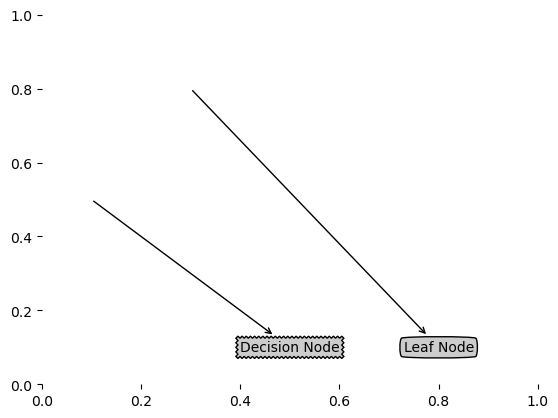

In [252]:
createPlot()

获取叶节点数目和树的层数